In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report, f1_score
from sklearn import tree 

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier


In [2]:

charac_pred = pd.read_csv('character-predictions.csv')

In [3]:
charac_pred.head()

S.No  actual  pred  alive   plod                  name  \
0     1       0     0  0.054  0.946  Viserys II Targaryen   
1     2       1     0  0.387  0.613           Walder Frey   
2     3       1     0  0.493  0.507          Addison Hill   
3     4       0     0  0.076  0.924           Aemma Arryn   
4     5       1     1  0.617  0.383        Sylva Santagar   

                  title  male   culture  dateOfBirth  ...  isAliveHeir  \
0                   NaN     1       NaN          NaN  ...          0.0   
1  Lord of the Crossing     1  Rivermen        208.0  ...          NaN   
2                   Ser     1       NaN          NaN  ...          NaN   
3                 Queen     0       NaN         82.0  ...          NaN   
4            Greenstone     0   Dornish        276.0  ...          NaN   

  isAliveSpouse isMarried isNoble   age numDeadRelations  boolDeadRelations  \
0           NaN         0       0   NaN               11                  1   
1           1.0         1       1  97.0                1                  1   
2           NaN         0       1   NaN                0                  0   
3           0.0         1       1  23.0                0                  0   
4           1.0         1       1  29.0                0                  0   

   isPopular  popularity  isAlive  
0          1    0.605351        0  
1          1    0.896321        1  
2          0    0.267559        1  
3          0    0.183946        0  
4          0    0.043478        1  

[5 rows x 33 columns]

In [4]:
charac_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 33 columns):
S.No                 1946 non-null int64
actual               1946 non-null int64
pred                 1946 non-null int64
alive                1946 non-null float64
plod                 1946 non-null float64
name                 1946 non-null object
title                938 non-null object
male                 1946 non-null int64
culture              677 non-null object
dateOfBirth          433 non-null float64
DateoFdeath          444 non-null float64
mother               21 non-null object
father               26 non-null object
heir                 23 non-null object
house                1519 non-null object
spouse               276 non-null object
book1                1946 non-null int64
book2                1946 non-null int64
book3                1946 non-null int64
book4                1946 non-null int64
book5                1946 non-null int64
isAliveMother        21 non

In [5]:
charac_pred.house.unique()

array([nan, 'House Frey', 'House Swyft', 'House Arryn', 'House Santagar',
       'House Targaryen', 'House Osgrey', "Night's Watch", 'House Humble',
       'House Wylde', 'House Wode', 'House Fell',
       'Brotherhood Without Banners', 'House Webber', 'House Greyjoy',
       'House Stark', 'House Waynwood', 'House Dayne', 'House Manderly',
       'House Farwynd of the Lonely Light', 'Happy Port',
       'House of Loraq', 'Kingswood Brotherhood', 'House Botley',
       'Burned Men', 'House Velaryon', 'House Tallhart', 'House Tyrell',
       'House Blackwood', 'House Blackfyre', 'wildling',
       'Kingdom of the Three Daughters',
       'House Royce of the Gates of the Moon', 'House Nayland',
       "House Vance of Wayfarer's Rest", 'House Rowan', 'House Farrow',
       'House Lonmouth', 'House Reyne', 'House Ashford', 'House Brax',
       'House Paege', 'House Hollard', 'House Tarth', 'House Ryswell',
       'House Lannister', 'House Crakehall', 'House Darklyn',
       'House Westerli

In [6]:
got = charac_pred.drop(['isAliveMother', 'isAliveFather','isAliveHeir', 'isAliveSpouse', 'age', 'S.No', 'actual', 'pred','plod' ,'title'  ], axis = 1)

In [7]:
got.columns

Index(['alive', 'name', 'male', 'culture', 'dateOfBirth', 'DateoFdeath',
       'mother', 'father', 'heir', 'house', 'spouse', 'book1', 'book2',
       'book3', 'book4', 'book5', 'isMarried', 'isNoble', 'numDeadRelations',
       'boolDeadRelations', 'isPopular', 'popularity', 'isAlive'],
      dtype='object')

In [8]:
got.drop(['mother', 'father', 'heir', 'spouse', 'culture', 'dateOfBirth', 'DateoFdeath', 'alive', 'boolDeadRelations', 'name'], axis = 1, inplace = True)

In [9]:
got.columns

Index(['male', 'house', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isMarried', 'isNoble', 'numDeadRelations', 'isPopular', 'popularity',
       'isAlive'],
      dtype='object')

In [10]:
got.isna().sum()

male                  0
house               427
book1                 0
book2                 0
book3                 0
book4                 0
book5                 0
isMarried             0
isNoble               0
numDeadRelations      0
isPopular             0
popularity            0
isAlive               0
dtype: int64

In [11]:
got.dropna(inplace = True)

In [12]:
len(got)

1519

In [13]:
got = got[(got['book1'] == 1) | (got['book2'] == 1) | (got['book3'] == 1) | (got['book4'] == 1) | (got['book5'] == 1) ]


In [14]:
len(got)

1328

In [15]:
got.house.nunique()

327

In [16]:
riverlands = [ "House Bracken","House Whent","House Charlton","House Butterwell","House Smallwood","House Mallister","House Vance of Atranta","House Piper","House Strong","House Roote","House Lothston","House Pemford",
"House Haigh","House Wode","House Blackwood","House Vance of Wayfarer's Rest","House Nayland","House Paege","House Heddle", "House Ryger","House Baelish","House Hawick","House Cox","House Darry","House Grell","House Erenford","House Goodbrook","House Lychester","House Mooton","House Mudd","House Wayn","House Vypren","House Blanetree"]

reach = ["House Ambrose","House Bushy","House Beesbury","House Bulwer","House Caswell","House Conklyn","House Redwyne","House Risley","House Willum","House Uffering","House Norcross","House Fossoway of New Barrel", "House Serry","House Meadows",
"House Mullendore","House Florent","House Inchfield","House Cockshaw","House Graceford","House Osgrey","House Webber","House Rowan","House Ashford",
"House Leygood","House Fossoway of Cider Hall","House Varner","House Costayne","House Hightower","House Oakheart","House Hunt"
,"House Wythers","House Ball","House Cuy","House Merryweather","House Peake","House Rhysling","House Tarly","House Vyrwel","House Chester" , 
"House Grimm","House Hewett","House Norridge","House Blackbar","House Fossoway","House Crane","House Tyrell of Brightwater Keep"]
         
north = ["House Manderly","House Bolton of the Dreadfort","House Karstark","House Bolton","House Mormont","House Glover","House Hornwood","House Umber","House Woods","House Tallhart","House Ryswell","House Stout","House Harclay","House Norrey","House Cassel","House Cerwyn","House Condon","House Dustin","House Flint of Widow's Watch","House Flint","House Mollen","House Locke","House Poole","Thenn","House Woolfield","House Reed","House Liddle","House Wull"]


major = ["House Arryn","House Frey","House Greyjoy","House Frey of Riverrun","House Martell","House Lannister of Lannisport","House Tully","House Tyrell"] 
    
game_players = ["House Lannister of Casterly Rock" , "House Baratheon of Dragonstone","House Baratheon","House Baratheon of King's Landing","House Lannister","House Stark","House Targaryen" ]         



westerlands = ["House Swyft", "House Payne","House Plumm","House Clifton","House Lorch","House Lefford","House Yew","House Stackspear" ,"House Jast","House Reyne","House Brax","House Crakehall","House Westerling","House Spicer","House Clegane","House Broom","House Banefort","House Kenning of Kayce","House Marbrand" , "House Prester" , "House Greenfield" , "House Lydden","House Bettley" , "House Turnberry","House Vikary","House Sarsfield","House Yarwyck" ,"House Peckledon","House Hetherspoon","House Moreland" ,"House Farman"]                

dorne = ["House Santagar", "House Dalt" , "House Qorgyle", "House Manwoody","House Blackmont","House Ruttiger" , "House Estren","House Allyrion","House Dayne of High Hermitage","House Fowler","House Gargalen" , "House Jordayne" , "House Toland","House Uller","House Vaith","House Wells","House Yronwood","House Nymeros Martell","House Drinkwater" ]

defenders = ["Night's Watch","Second Sons","Brotherhood Without Banners","Stormcrows","Faceless Men","Sea watch","Queensguard","Brotherhood without banners","Kingsguard", "City Watch of King's Landing","Stone Crows","Brave Companions","Alchemists' Guild","Antler Men","Moon Brothers","wildling","Burned Men" , "Drowned men","R'hllor","Iron Bank of Braavos","brotherhood without banners","Three-eyed crow","Mance Rayder","Khal","Thirteen","Maesters","Citadel","Wise Masters","The Citadel","Good Masters" , "Undying Ones","Unsullied","Golden Company", "Faith of the Seven","Chataya's brothel","Kingswood Brotherhood","Kingdom of the Three Daughters","Band of Nine","Brotherhood without Banners","Company of the Cat","Summer Islands"]

crownlands = ["House Blackfyre","House Blount","House Byrch","House Bywater","House Chelsted" , "House Chyttering" , "House Darklyn" , "House Farring","House Gaunt","House Hayford","House Hogg","House Hollard","House Kettleblack","House Longwaters","House Mallery","House Massey","House Rosby","House Rykker","House Staunton","House Stokeworth","House Hardy","House Boggs","House Celtigar","House Velaryon","House Crabb","House Thorne","House Bar Emmon","House Brune of Brownhollow","House Brune of the Dyre Den" ,"House Sunglass","House Rambton", "House Slynt"]
 

ironislands = ["House Blacktyde","House Harlaw","House Codd" , "House Goodbrother","House Tawney","House Kenning of Harlaw","House Shepherd","House Wynch","House Humble","House Dayne","House Weaver","House Drumm","House Stonetree","House Sparr","House Ironmaker","House Sharp","House Botley","House Farwynd of the Lonely Light","House Goodbrother of Shatterstone","House Farwynd","House Harlaw of Harridan Hill","House Harlaw of the Tower of Glimmering","House Myre","House Stonehouse","House Hoare","House Harlaw of Harlaw Hall","House Volmark","House Vance","House Merlyn","House Harlaw of Grey Garden","Graces"]


stormlands = ["House Buckler","House Morrigen","House Grandison","House Bolling","House Swann","House Penrose","House Cafferen","House Dondarrion","House Mertyns","House Estermont","House Staedmon", "House Seaworth","House Wylde","House Fell","House Lonmouth","House Tarth","House Connington","House Foote","House Caron","House Wagstaff", "House Toyne" , "House Gower" , "House Selmy","House Horpe","House Errol", "House Trant" , "House Hasty", "House Cole"]


minor = ["House Greenhill", "Black Ears","Pureborn","House of Galare","House Sawyer","House Blackberry","House Cupps","House Penny","Windblown" , "House of Ghazeen" , "Happy Port","House of Loraq","House Farrow","Peach","House Suggs","House Leek" , "Blacks" , "House of Pahl","House of Merreq","House Strickland","House Potter", "House of Kandaq","House of Reznak"]
   
 
      
vale = ["House Redfort","House Deddings","House Corbray","House Grafton","House Royce","House Waynwood","House Royce of the Gates of the Moon","House Lynderly", "House Belmore","House Shett of Gull Tower","House Hardyng","House Hunter" , "House Borrell","House Longthorpe","House Coldwater","House Templeton","House Sunderland","House Tollett","House Moore","House Egen"]                
                
                
                

In [17]:
got.house = got.house.replace(riverlands, 'Riverlands')
got.house = got.house.replace(reach, 'Reach')
got.house = got.house.replace(north, 'The_north')
got.house = got.house.replace(major, 'major_house')
got.house = got.house.replace(game_players, 'Claim_to_throne')
got.house = got.house.replace(westerlands, 'Westerland')
got.house = got.house.replace(dorne, 'Dorne')
got.house = got.house.replace(defenders, 'Defenders_Tribes_Bands')
got.house = got.house.replace(crownlands, 'Crownlands')
got.house = got.house.replace(ironislands, 'IronIslands')
got.house = got.house.replace(stormlands, 'Stormlands')
got.house = got.house.replace(vale, 'The Vale')
got.house = got.house.replace(minor, 'Minor House')
got.house = got.house.replace('DOrne', 'Dorne')

In [18]:
got.house.unique()

array(['major_house', 'Westerland', 'Dorne', 'Defenders_Tribes_Bands',
       'IronIslands', 'Riverlands', 'Claim_to_throne', 'The_north',
       'Minor House', 'The Vale', 'Reach', 'Stormlands', 'Crownlands'],
      dtype=object)

In [19]:
got.house.nunique()

13

In [20]:
got.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328 entries, 1 to 1945
Data columns (total 13 columns):
male                1328 non-null int64
house               1328 non-null object
book1               1328 non-null int64
book2               1328 non-null int64
book3               1328 non-null int64
book4               1328 non-null int64
book5               1328 non-null int64
isMarried           1328 non-null int64
isNoble             1328 non-null int64
numDeadRelations    1328 non-null int64
isPopular           1328 non-null int64
popularity          1328 non-null float64
isAlive             1328 non-null int64
dtypes: float64(1), int64(11), object(1)
memory usage: 145.2+ KB


In [21]:
dummies = pd.get_dummies(got.house)

houses = ['Claim_to_throne', 'Crownlands', 'Defenders_Tribes_Bands', 'Dorne',
       'IronIslands', 'Minor House', 'Reach', 'Riverlands', 'Stormlands',
       'The Vale', 'The_north', 'Westerland', 'major_house']
for i in houses:
    got[i] = dummies[i]
got.head()

male                   house  book1  book2  book3  book4  book5  \
1      1             major_house      1      1      1      1      1   
2      1              Westerland      0      0      0      1      0   
4      0                   Dorne      0      0      0      1      0   
10     1  Defenders_Tribes_Bands      1      1      0      0      0   
15     1             IronIslands      0      0      0      1      0   

    isMarried  isNoble  numDeadRelations  ...  Dorne  IronIslands  \
1           1        1                 1  ...      0            0   
2           0        1                 0  ...      0            0   
4           1        1                 0  ...      1            0   
10          0        0                 0  ...      0            0   
15          0        0                 0  ...      0            1   

    Minor House  Reach  Riverlands  Stormlands  The Vale  The_north  \
1             0      0           0           0         0          0   
2             0      0           0           0         0          0   
4             0      0           0           0         0          0   
10            0      0           0           0         0          0   
15            0      0           0           0         0          0   

    Westerland  major_house  
1            0            1  
2            1            0  
4            0            0  
10           0            0  
15           0            0  

[5 rows x 26 columns]

In [22]:
got.drop(['house'], axis = 1, inplace = True)

In [23]:
X = got.drop(['isAlive'], axis = 1)
y = got['isAlive']


In [24]:
X.head()

male  book1  book2  book3  book4  book5  isMarried  isNoble  \
1      1      1      1      1      1      1          1        1   
2      1      0      0      0      1      0          0        1   
4      0      0      0      0      1      0          1        1   
10     1      1      1      0      0      0          0        0   
15     1      0      0      0      1      0          0        0   

    numDeadRelations  isPopular  ...  Dorne  IronIslands  Minor House  Reach  \
1                  1          1  ...      0            0            0      0   
2                  0          0  ...      0            0            0      0   
4                  0          0  ...      1            0            0      0   
10                 0          0  ...      0            0            0      0   
15                 0          0  ...      0            1            0      0   

    Riverlands  Stormlands  The Vale  The_north  Westerland  major_house  
1            0           0         0          0           0            1  
2            0           0         0          0           1            0  
4            0           0         0          0           0            0  
10           0           0         0          0           0            0  
15           0           0         0          0           0            0  

[5 rows x 24 columns]

In [25]:

X_train, X_test , y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)



X_train.shape, X_test.shape, X.shape #do I have to do 

((929, 24), (399, 24), (1328, 24))

In [26]:
clf= DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,y_train) 
y_pred = clf.predict(X_test)

In [27]:

# Calculate Accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))


#Check F1 score for precision
f1score = f1_score(y_test, y_pred) * 100

print('F1 score is :{0}'.format(f1score))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)



Accuracy is :77.69423558897243

AUC is :0.69
F1 score is :85.71428571428571

Confusion Matrix
----------------


Predicted   0    1  All
True                   
0          43   37   80
1          52  267  319
All        95  304  399

In [28]:
feature_name = X.columns

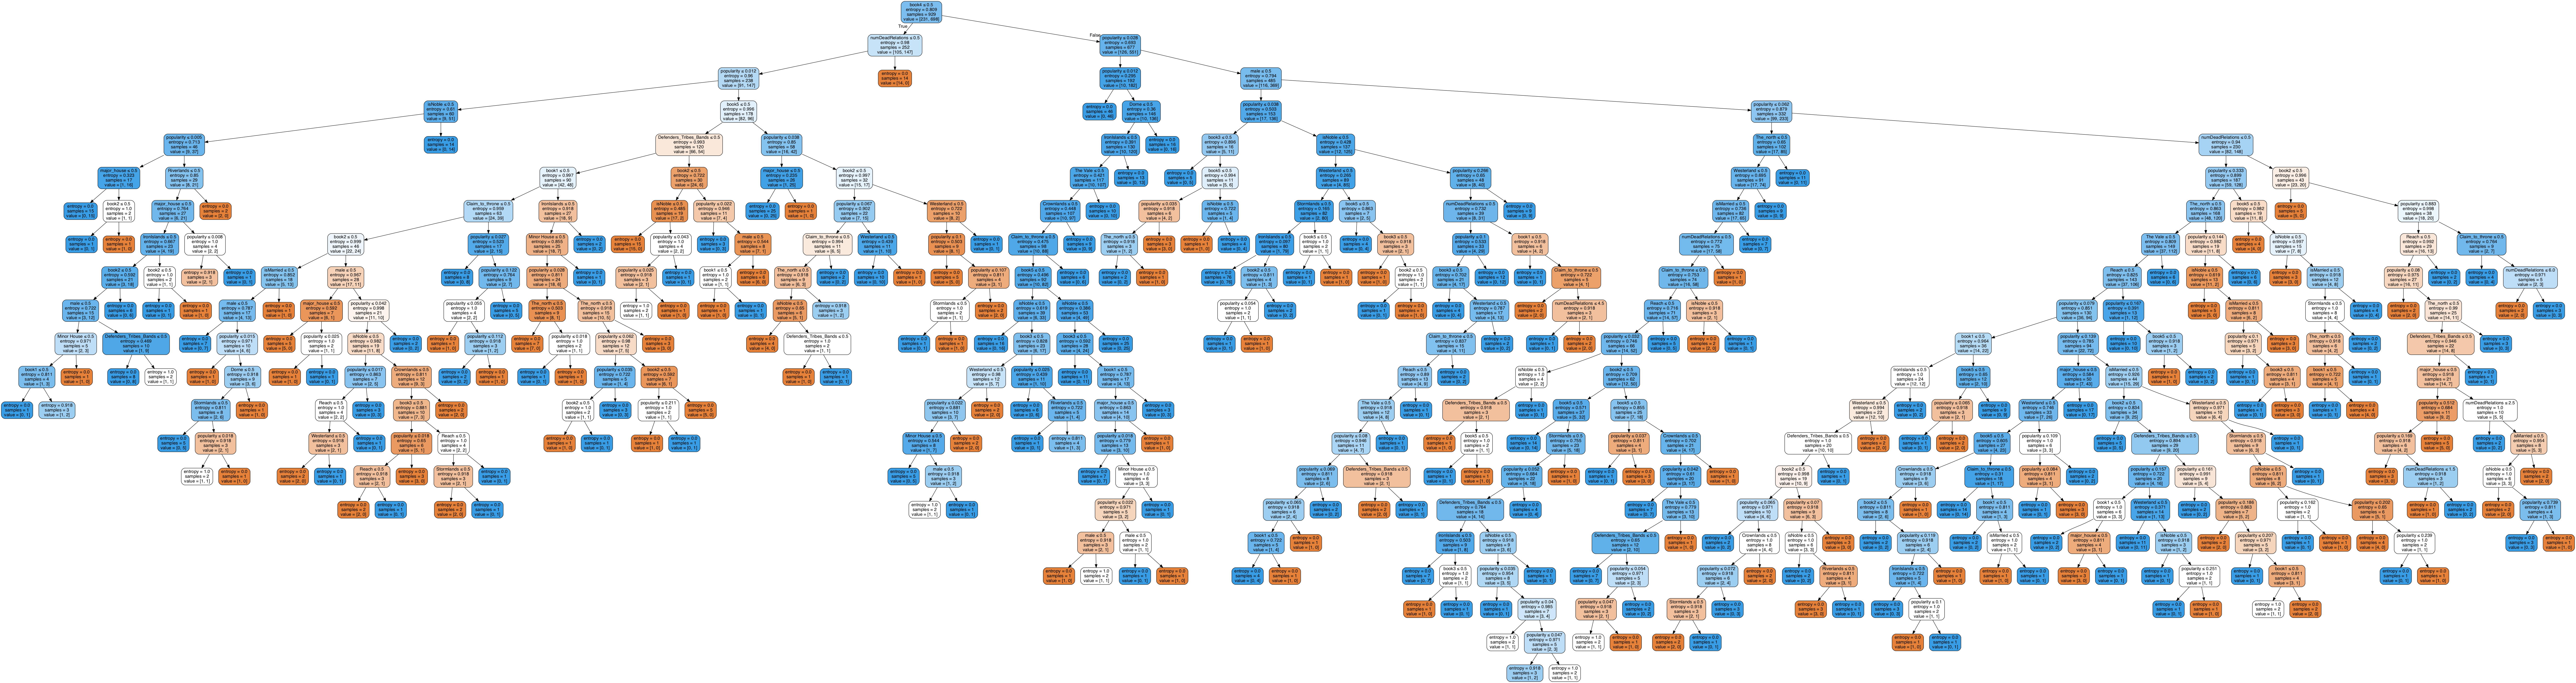

In [29]:
dot_data = StringIO()


export_graphviz(clf, out_file=dot_data, filled=True, rounded=True,special_characters=True, feature_names=feature_name)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [30]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6],
    
    
}

In [31]:
gs_tree = GridSearchCV(clf, param_grid, cv = 3)
gs_tree.fit(X_train, y_train)
print('The best paramaters are ', gs_tree.best_params_)

The best paramaters are  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [32]:
clf2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 6, min_samples_leaf = 4, min_samples_split = 10)
clf2.fit(X_train,y_train) 
y_pred2 = clf2.predict(X_test)

In [33]:
# Calculate Accuracy 
acc = accuracy_score(y_test,y_pred2) * 100
print("Accuracy is :{0}".format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))


#Check F1 score for precision
f1score = f1_score(y_test, y_pred2) * 100

print('F1 score is :{0}'.format(f1score))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred2, rownames=['True'], colnames=['Predicted'], margins=True)


Accuracy is :79.19799498746866

AUC is :0.66
F1 score is :87.13178294573643

Confusion Matrix
----------------


Predicted   0    1  All
True                   
0          35   45   80
1          38  281  319
All        73  326  399

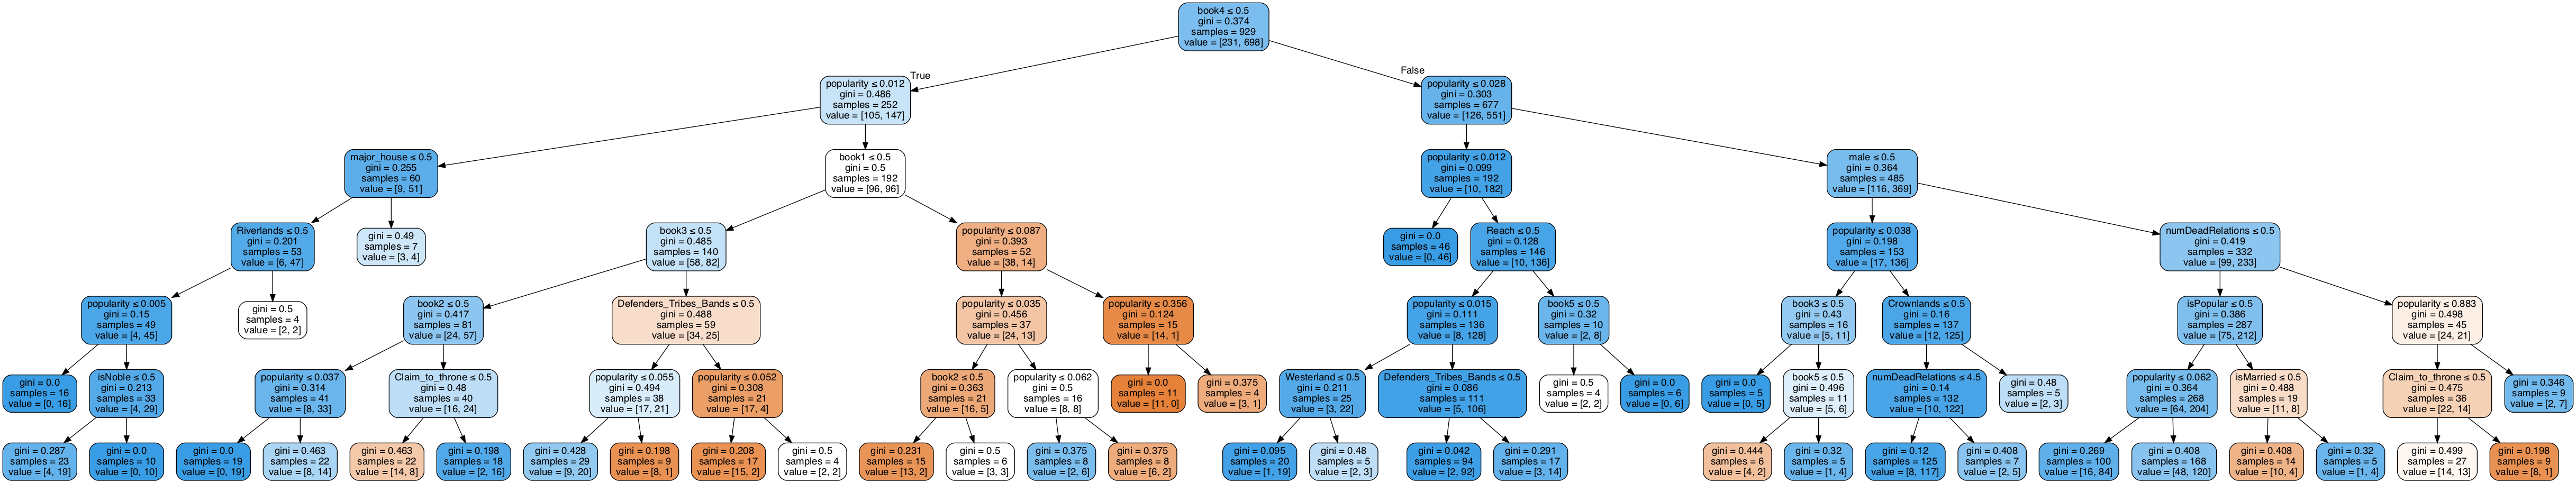

In [34]:
dot_data = StringIO()


export_graphviz(clf2, out_file=dot_data, filled=True, rounded=True,special_characters=True, feature_names=feature_name)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [35]:
#check if train test split is still fine
X_train.shape, X_test.shape, X.shape

((929, 24), (399, 24), (1328, 24))

In [36]:
#random forest
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)

In [37]:
#Check Accuracy
accuracy = accuracy_score(y_test, forest_pred) # accuracy

print('Accuracy score is :{0}'.format(accuracy))
#Check F1 score for precision
f1score = f1_score(y_test, forest_pred) * 100

print('F1 score is :{0}'.format(f1score))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, forest_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy score is :0.8170426065162907
F1 score is :88.61154446177848

Confusion Matrix
----------------


Predicted   0    1  All
True                   
0          42   38   80
1          35  284  319
All        77  322  399

In [38]:
gs_tree2 = GridSearchCV(forest, param_grid, cv = 3)
gs_tree2.fit(X_train, y_train)
print('The best paramaters are ', gs_tree2.best_params_)

The best paramaters are  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [42]:
forest2 = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_leaf=2, min_samples_split=5)
forest2.fit(X_train, y_train)
forest_pred2 = forest2.predict(X_test)

In [43]:
#Check Accuracy
accuracy = accuracy_score(y_test, forest_pred2) # accuracy

print('Accuracy score is :{0}'.format(accuracy))
#Check F1 score for precision
f1score = f1_score(y_test, forest_pred2) * 100

print('F1 score is :{0}'.format(f1score))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, forest_pred2, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy score is :0.8446115288220551
F1 score is :90.6344410876133

Confusion Matrix
----------------


Predicted   0    1  All
True                   
0          37   43   80
1          19  300  319
All        56  343  399

In [44]:

def plot_feature_importances(model, data_train):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [45]:
def feature_imp(model, x):
    return pd.Series(model.feature_importances_,index= X.columns).sort_values(ascending=False)


In [46]:
feature_imp(forest,X)

popularity                0.344069
book4                     0.069465
numDeadRelations          0.057478
book5                     0.054641
male                      0.046875
book1                     0.046668
isNoble                   0.043136
book3                     0.041217
book2                     0.039674
isMarried                 0.027616
Claim_to_throne           0.027378
Defenders_Tribes_Bands    0.025360
major_house               0.025195
The_north                 0.020870
Riverlands                0.018278
Westerland                0.017823
Stormlands                0.016714
isPopular                 0.016158
IronIslands               0.015637
Reach                     0.014022
Crownlands                0.011931
Minor House               0.007248
Dorne                     0.006795
The Vale                  0.005753
dtype: float64

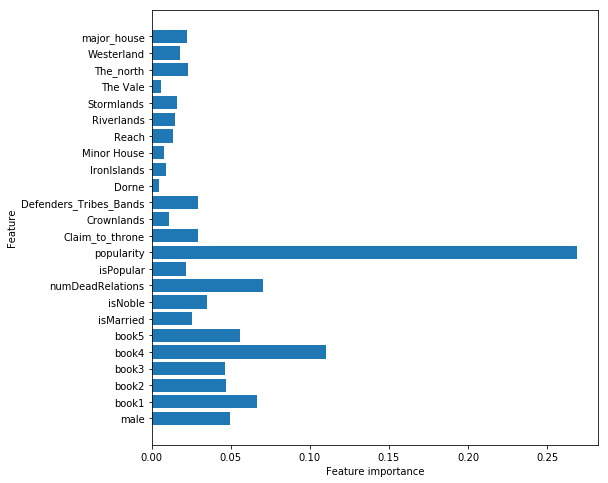

In [47]:
plot_feature_importances(forest2, X_train)

In [48]:
forest_bottom5 = ['Minor House','Reach','Westerland','The Vale','Crownlands' , 'Dorne']
newX = X.drop(forest_bottom5, axis = 1)
X_trainb5, X_testb5 , Y_trainb5, Y_testb5 = train_test_split(newX, y, test_size = 0.3, random_state = 100)

forestb5 = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_leaf=2, min_samples_split=5)
forestb5.fit(X_trainb5,Y_trainb5)
forestb5pred = forestb5.predict(X_testb5)



In [49]:
#Accuracy
accuracy = accuracy_score(Y_testb5, forestb5pred)


#Check F1 score for precision
f1score = f1_score(Y_testb5, forestb5pred)

print('F1 score is :{0}'.format(f1score))
print('Accuracy score is :{0}'.format(accuracy))
#Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(Y_testb5, forestb5pred, rownames=['True'], colnames=['Predicted'], margins=True)

F1 score is :0.9030303030303032
Accuracy score is :0.8395989974937343

Confusion Matrix
----------------


Predicted   0    1  All
True                   
0          37   43   80
1          21  298  319
All        58  341  399

In [50]:
xclf = xgb.XGBClassifier()
xclf.fit(X_train, y_train)
xgb_preds = xclf.predict(X_test)

#Accuracy
accuracy = accuracy_score(y_test, xgb_preds)

#Check F1 score for precision
f1score = f1_score(y_test, xgb_preds)

print('F1 score is :{0}'.format(f1score))
print('Accuracy score is :{0}'.format(accuracy))
#Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, xgb_preds, rownames=['True'], colnames=['Predicted'], margins=True)

F1 score is :0.8995502248875562
Accuracy score is :0.8320802005012531

Confusion Matrix
----------------


Predicted   0    1  All
True                   
0          32   48   80
1          19  300  319
All        51  348  399

In [51]:

param_grid = {
    "learning_rate": [0.1, 0.8, 0.10],
    'max_depth': [5, 10, 15],
    'min_child_weight': [10, 15],
    'subsample': [0.2, 0.5, 0.7],
    'n_estimators': [5, 30, 100, 250],
}

In [52]:
gs_tree3 = GridSearchCV(xclf, param_grid, cv = 3)
gs_tree3.fit(X_train, y_train)
print('The best paramaters are ', gs_tree3.best_params_)

The best paramaters are  {'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 30, 'subsample': 0.7}


In [53]:
xclf2 = xgb.XGBClassifier(learning_rate=0.1, max_depth=10, min_child_weight=10, n_estimators=30, subsample = .7)
xclf2.fit(X_train, y_train)
xgb_preds2 = xclf2.predict(X_test)

#Accuracy
accuracy = accuracy_score(y_test, xgb_preds2)

#Check F1 score for precision
f1score = f1_score(y_test, xgb_preds2)

print('F1 score is :{0}'.format(f1score))
print('Accuracy score is :{0}'.format(accuracy))
#Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, xgb_preds2, rownames=['True'], colnames=['Predicted'], margins=True)

F1 score is :0.896551724137931
Accuracy score is :0.8270676691729323

Confusion Matrix
----------------


Predicted   0    1  All
True                   
0          31   49   80
1          20  299  319
All        51  348  399

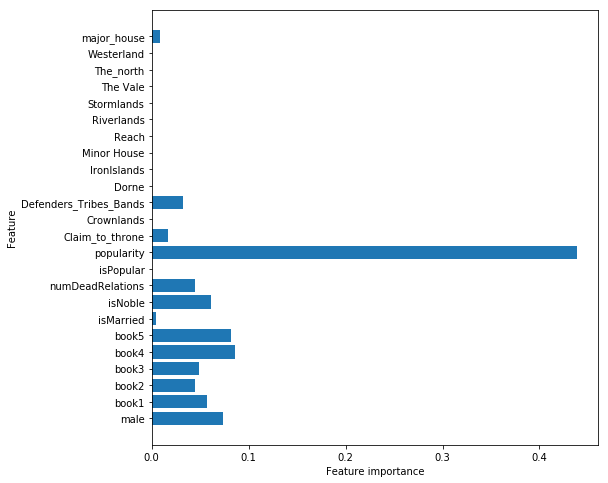

In [54]:
plot_feature_importances(xclf2, X_train)

In [55]:
feature_imp(xclf2,X)

popularity                0.438525
book4                     0.086066
book5                     0.081967
male                      0.073770
isNoble                   0.061475
book1                     0.057377
book3                     0.049180
book2                     0.045082
numDeadRelations          0.045082
Defenders_Tribes_Bands    0.032787
Claim_to_throne           0.016393
major_house               0.008197
isMarried                 0.004098
Crownlands                0.000000
Westerland                0.000000
Dorne                     0.000000
isPopular                 0.000000
IronIslands               0.000000
Minor House               0.000000
Reach                     0.000000
Riverlands                0.000000
Stormlands                0.000000
The Vale                  0.000000
The_north                 0.000000
dtype: float32

In [56]:
x_bottom5 = ['Minor House','Reach','Westerland','The Vale','Crownlands' , 'Dorne', 'The_north', 'Stormlands', 'Riverlands', 'IronIslands', 'isPopular',]
xgbX = X.drop(x_bottom5, axis = 1)

In [58]:
X_trainxgb5, X_testxgb5 , Y_trainxgb5, Y_testxgb5 = train_test_split(xgbX, y, test_size = 0.3, random_state = 100)
xgb5 = xgb.XGBClassifier(learning_rate=0.1, max_depth=10, min_child_weight=10, n_estimators=30, subsample = .7)
xgb5.fit(X_trainxgb5,Y_trainxgb5)
xgb5_preds = xgb5.predict(X_testxgb5)


In [59]:
#Accuracy
accuracy = accuracy_score(y_test, xgb5_preds)

#Check F1 score for precision
f1score = f1_score(y_test, xgb5_preds)

print('F1 score is :{0}'.format(f1score))
print('Accuracy score is :{0}'.format(accuracy))
#Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(Y_testxgb5, xgb5_preds, rownames=['True'], colnames=['Predicted'], margins=True)

F1 score is :0.9034175334323922
Accuracy score is :0.8370927318295739

Confusion Matrix
----------------


Predicted   0    1  All
True                   
0          30   50   80
1          15  304  319
All        45  354  399

In [62]:
xgbX.head(1)

male  book1  book2  book3  book4  book5  isMarried  isNoble  \
1     1      1      1      1      1      1          1        1   

   numDeadRelations  popularity  Claim_to_throne  Defenders_Tribes_Bands  \
1                 1    0.896321                0                       0   

   major_house  
1            1

In [99]:
df = pd.read_csv('character-predictions.csv')

In [100]:
jon_snow = df.loc[df['name'] == 'Jon Snow']

In [101]:
jon_snow

S.No  actual  pred  alive   plod      name  \
1749  1750       1     1  0.884  0.116  Jon Snow   

                                    title  male   culture  dateOfBirth  ...  \
1749  Lord Commander of the Night's Watch     1  Northmen        283.0  ...   

      isAliveHeir isAliveSpouse isMarried isNoble   age numDeadRelations  \
1749          NaN           NaN         0       1  22.0                5   

      boolDeadRelations  isPopular  popularity  isAlive  
1749                  1          1         1.0        1  

[1 rows x 33 columns]

In [102]:
jon_snow.house

1749    House Stark
Name: house, dtype: object

In [103]:
jon_snow.columns

Index(['S.No', 'actual', 'pred', 'alive', 'plod', 'name', 'title', 'male',
       'culture', 'dateOfBirth', 'DateoFdeath', 'mother', 'father', 'heir',
       'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'boolDeadRelations',
       'isPopular', 'popularity', 'isAlive'],
      dtype='object')

In [104]:
jon_snow.drop(['S.No', 'actual', 'pred', 'alive', 'plod', 'name', 'title', 'isAlive', 
       'culture', 'dateOfBirth', 'DateoFdeath', 'mother', 'father', 'heir',
       'house', 'spouse','isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse','age',  'boolDeadRelations',
       'isPopular'], axis = 1, inplace = True)

In [105]:
jon_snow['Claim_to_throne'] = 1
jon_snow['Defenders_Tribes_Bands'] = 0
jon_snow['major_house'] = 0

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [106]:
jon_snow

male  book1  book2  book3  book4  book5  isMarried  isNoble  \
1749     1      1      1      1      1      1          0        1   

      numDeadRelations  popularity  Claim_to_throne  Defenders_Tribes_Bands  \
1749                 5         1.0                1                       0   

      major_house  
1749            0

In [107]:
xgb5.predict(jon_snow)

array([1])